In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import warnings
warnings.simplefilter("ignore")

In [6]:
df = pd.read_csv("train.csv")

In [7]:
df.sample(100)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1942,1279,1,2.5,0,5,1,7,0.5,105,6,...,560,1633,1150,7,2,7,1,0,0,1
947,907,0,1.4,1,3,0,42,0.2,151,1,...,171,507,584,11,9,6,1,0,0,0
256,601,1,1.4,0,4,1,4,0.1,154,4,...,356,765,532,12,8,10,1,1,1,0
567,1269,1,1.3,0,14,0,52,0.8,118,2,...,1597,1920,665,18,5,5,0,0,0,1
340,821,0,1.8,1,5,0,54,0.1,109,3,...,253,1786,3185,8,4,15,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,1861,1,0.9,0,4,1,55,0.5,148,7,...,1698,1877,601,7,5,4,1,0,0,1
376,1899,1,0.6,0,0,0,26,0.1,151,2,...,96,814,336,13,11,4,1,0,1,0
1354,1998,1,1.2,0,8,0,31,0.6,196,8,...,50,1356,2311,17,9,18,1,1,0,2
684,706,0,0.5,0,13,1,31,0.1,108,3,...,543,938,2419,8,7,4,1,0,1,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

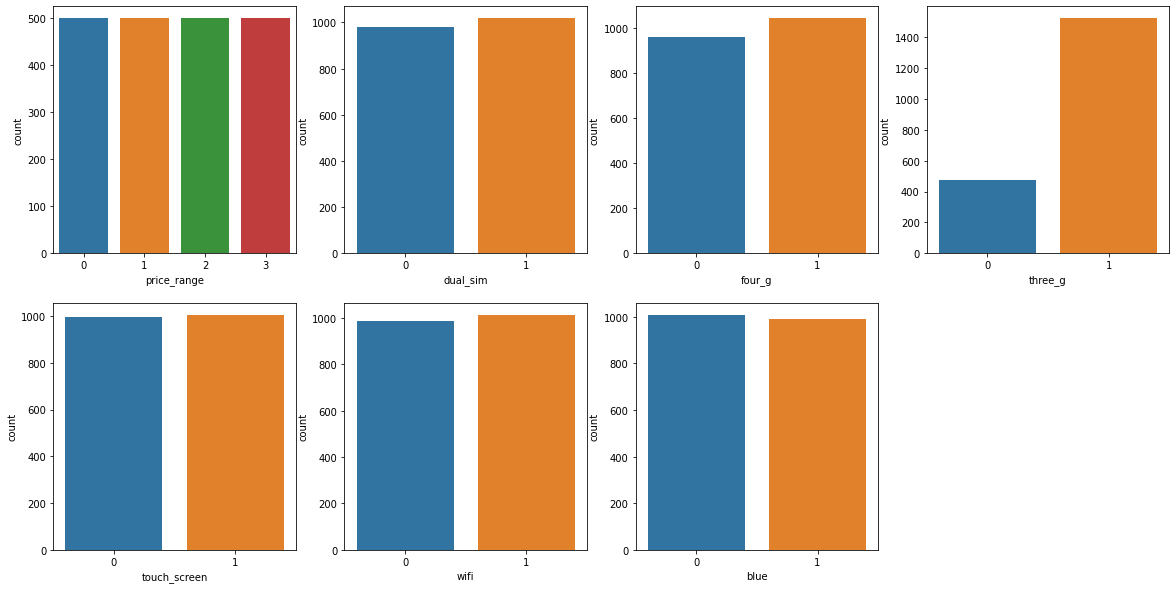

In [9]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
sns.countplot(df["price_range"])
plt.subplot(2,4,2)
sns.countplot(df["dual_sim"])
plt.subplot(2,4,3)
sns.countplot(df["four_g"])
plt.subplot(2,4,4)
sns.countplot(df["three_g"])
plt.subplot(2,4,5)
sns.countplot(df["touch_screen"])
plt.subplot(2,4,6)
sns.countplot(df["wifi"])
plt.subplot(2,4,7)
sns.countplot(df["blue"])
plt.show()

In [10]:
all_continous=df[["battery_power","clock_speed","fc","int_memory","m_dep","mobile_wt","n_cores","pc","px_height","px_width","ram","sc_h","sc_w"]]

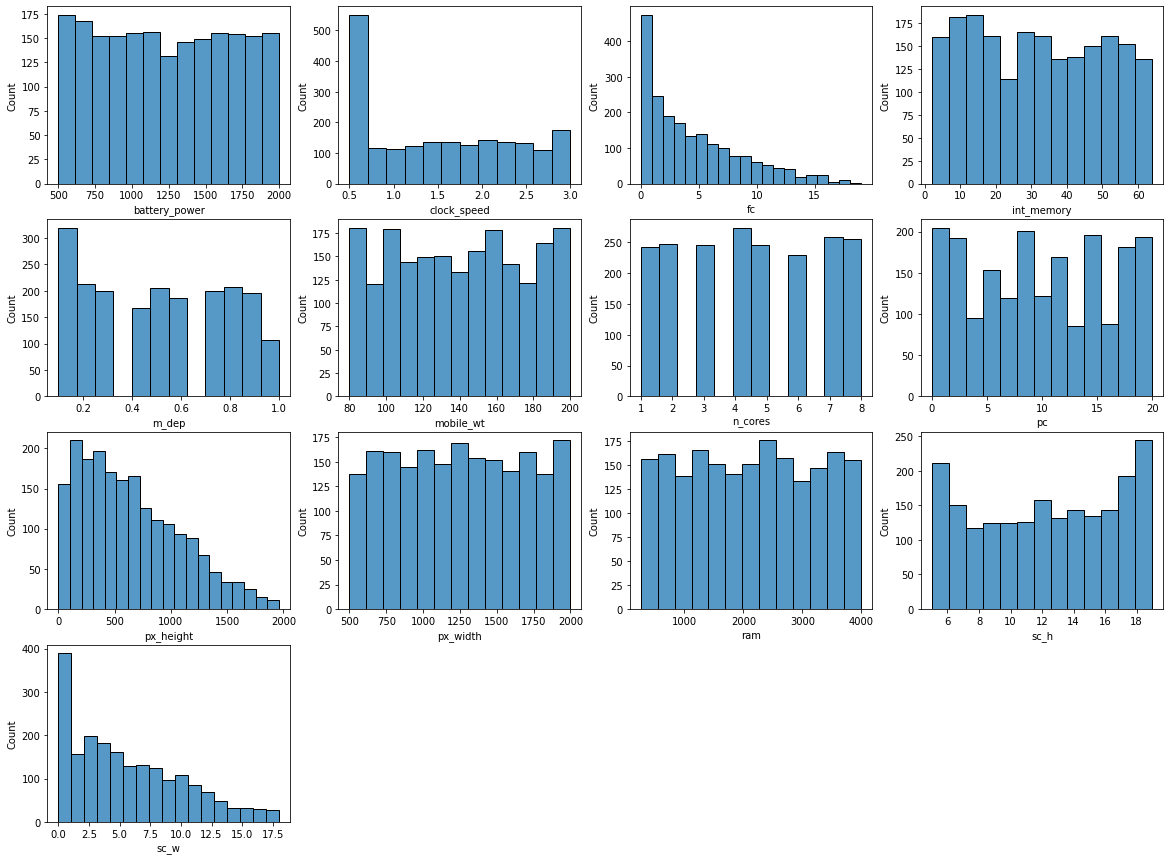

In [11]:
plt.figure(figsize=(20,15))
for i,j in enumerate(all_continous.columns):
    plt.subplot(4,4,(i+1))
    sns.histplot(all_continous[j])

In [12]:
df_corr = df.corr()

<AxesSubplot:>

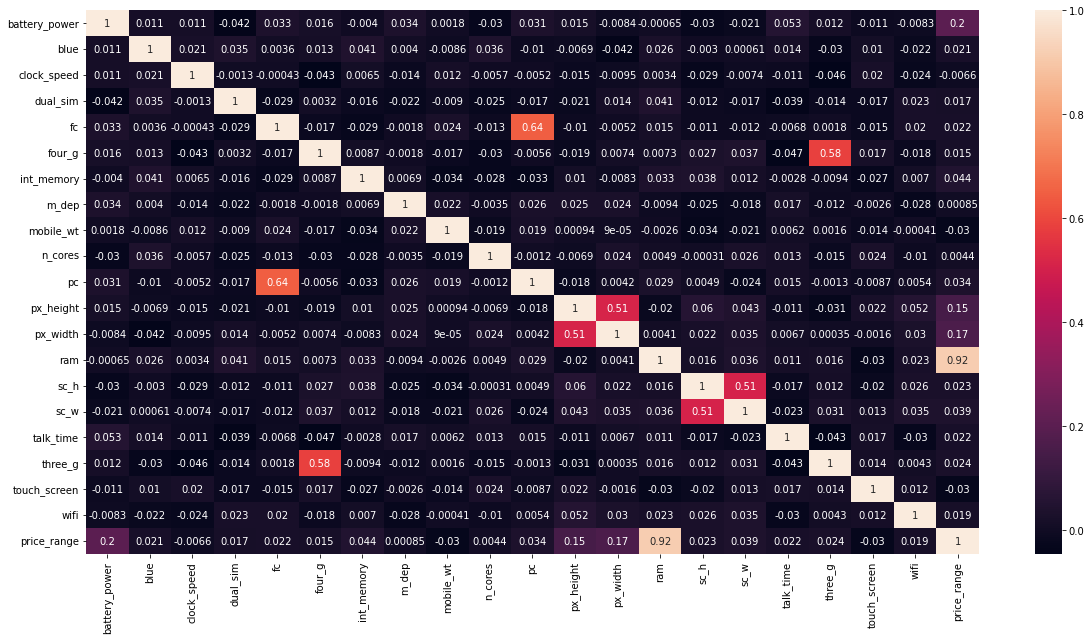

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df_corr,annot=True)

In [14]:
df_corr[df_corr["price_range"] >= 0]["price_range"]

battery_power    0.200723
blue             0.020573
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

In [15]:
all_continous_withprice=df[["battery_power","clock_speed","fc","int_memory","m_dep","mobile_wt","n_cores","pc","px_height","px_width","ram","sc_h","sc_w","price_range"]]

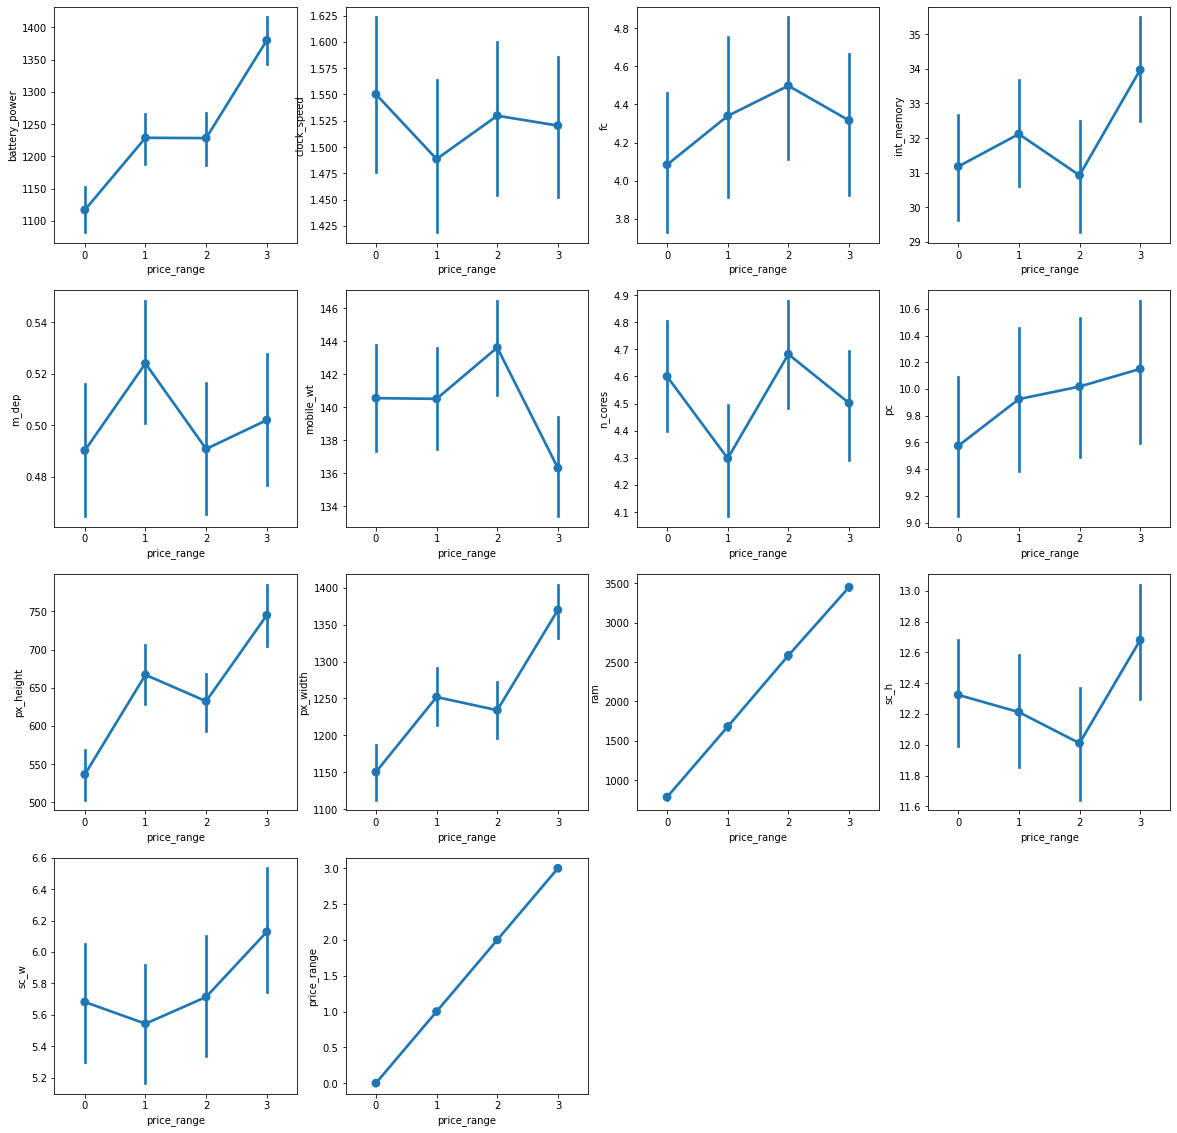

In [28]:
plt.figure(figsize=(20,20))
for i,j in enumerate(all_continous_withprice.columns):
    plt.subplot(4,4,(i+1))
    sns.pointplot(x=all_continous_withprice["price_range"],y=all_continous_withprice[j],data=all_continous_withprice)
    #plt.title(j)

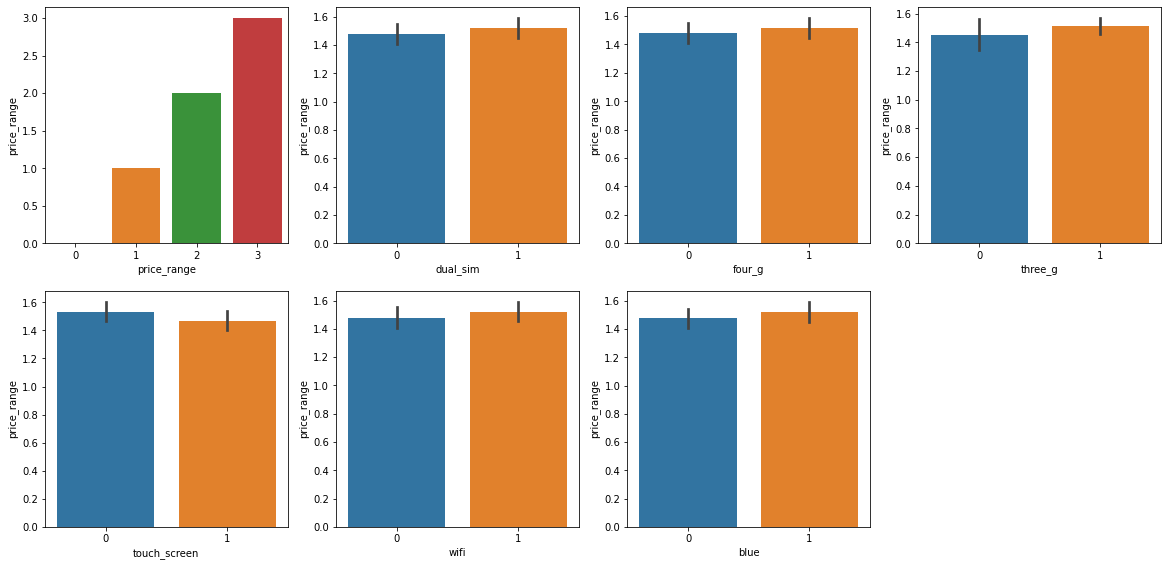

In [25]:
all_category_withprice = df[["price_range","dual_sim","four_g","three_g","touch_screen","wifi","blue"]]
plt.figure(figsize=(20,20))
for i,j in enumerate(all_category_withprice.columns):
    plt.subplot(4,4,(i+1))
    sns.barplot(x=all_category_withprice[j],y=all_category_withprice["price_range"],data=all_category_withprice)
    #plt.title(j)
    

In [35]:
chi2_result=chi2_contingency(pd.crosstab(index=all_category_withprice["dual_sim"],columns=all_category_withprice["price_range"]))

In [37]:
chi2_result[1]

0.7323497176264594